# Inspecting and preparing the data

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


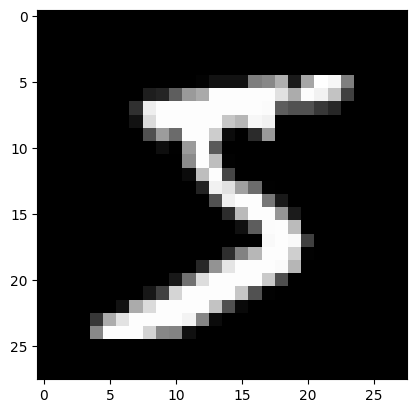

Label: 5


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(f'Label: {y_train[0]}')

In [4]:
# Copy train and test set
x_train_normalized = np.copy(x_train)
x_test_normalized = np.copy(x_test)

In [5]:
# Simple preprocessing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Expand the dimension of the data, because we need the number of channels associated to our input.
# If the image was RGB we would already have 3 channels
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
# Normalization
mean = np.mean(x_train_normalized)  # Train set mean
std = np.std(x_train_normalized)    # Train set std

# Normalize train and test sets
x_train_normalized = (x_train_normalized - mean) / std
x_test_normalized = (x_test_normalized - mean) / std

# Expand the dimension of the data, because we need the number of channels associated to our input (grayscale).
x_train_normalized = np.expand_dims(x_train_normalized, -1)
x_test_normalized = np.expand_dims(x_test_normalized, -1)

# Print the statistics of the normalized data
print("After normalization:")
print("Training data mean:", np.mean(x_train_normalized))
print("Training data std:", np.std(x_train_normalized))
print("Test data mean:", np.mean(x_test_normalized))
print("Test data std:", np.std(x_test_normalized))

print(x_train_normalized.shape, x_test_normalized.shape)

After normalization:
Training data mean: -3.064638490070051e-17
Training data std: 0.9999999999999998
Test data mean: 0.0060177948928480576
Test data std: 1.0077000453879372
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
# One-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Starting model (34,826 parameters)

This is the model we did in class, it serves as a benchmark for what can be achieved with a model that has more parameters.

It uses the simple data preparation and one-hot encoding.

In [16]:
# CNN model
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'), # First convolutional layer (2D) with 32 filters, each with a 3x3 size.
                                                                 # The activation is performed directly after the convolution
                                                                 # By default the stride is 1
        layers.MaxPooling2D(pool_size=(2,2)), # By default the stride is equal to the selected pool size
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'), # Second convolutional layer
        layers.MaxPooling2D(pool_size=(2,2)), # Second pooling layer

        layers.Flatten(), # We need to convert the output volume into a one dimensional array
        layers.Dropout(0.5), # This will switch off randomly, at each iteration, 50% of the nodes. After the training they will be all turned back on
        layers.Dense(num_classes, activation='softmax') # Fully connected layer that maps the size of the flatten layer into 10 neurons (num_classes),
                                                        # with a softmax activation to have a probability distribution
    ]
)

model.summary()
# 3 x 3 (filter size 3x3) x 32 (depth, number of filters) x 64 (size of the conv layer) + 64 (bias, one for each) = 18.496
# "None" because it depends on the batch size that we're going to use

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.7628 - loss: 0.7842 - val_accuracy: 0.9712 - val_loss: 0.1017
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9591 - loss: 0.1330 - val_accuracy: 0.9806 - val_loss: 0.0706
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.9718 - loss: 0.0937 - val_accuracy: 0.9835 - val_loss: 0.0585
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9771 - loss: 0.0758 - val_accuracy: 0.9847 - val_loss: 0.0519
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9785 - loss: 0.0679 - val_accuracy: 0.9862 - val_loss: 0.0467
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9807 - loss: 0.0618 - val_accuracy: 0.9872 - val_loss: 0.0440
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9868 - val_loss: 0.0440
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9842 - loss: 0

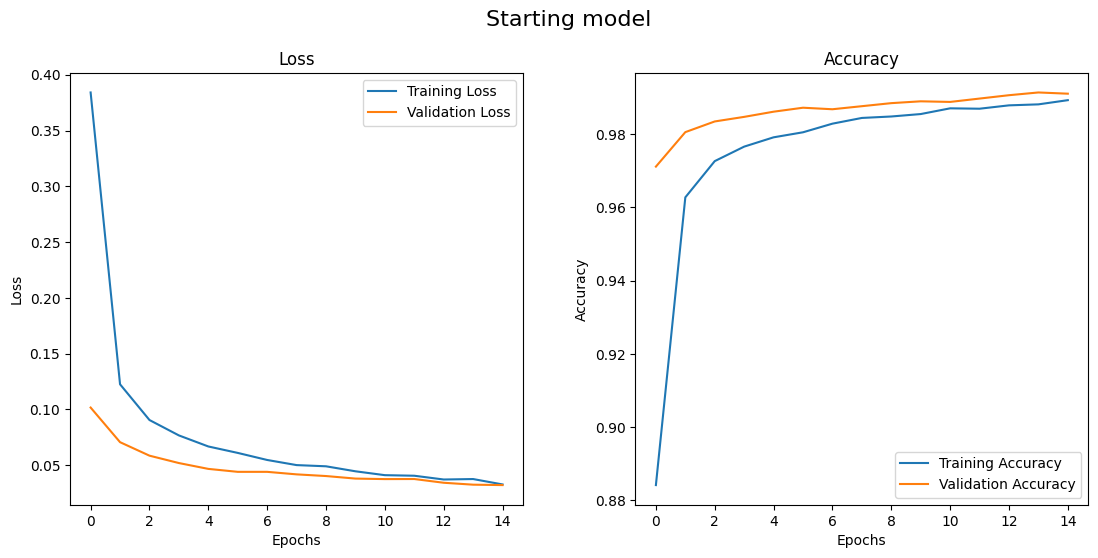

In [18]:
def plot_performance(history, title="Model"):
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  fig.tight_layout(pad=5.0)
  plt.suptitle(title, fontsize=16)
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training Loss')
  ax[0].plot(val_loss, label='Validation Loss')
  ax[0].legend()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training Accuracy')
  ax[1].plot(val_acc, label='Validation Accuracy')
  ax[1].legend()
  plt.show()

plot_performance(history, "Starting model")

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024789882823824883
Test accuracy: 0.9908999800682068


# First model

The following model is simply the first model I created that has a number of parameters below 7000, so this is the starting point that I will try to make better.

In [112]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(5,5)),
        layers.Conv2D(16, kernel_size=(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model1.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_76 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 4, 4, 16)            │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,034 (11.85 KB)

 Trainable params: 3,034 (11.85 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
batch_size = 128
epochs = 15

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5214 - loss: 1.6068 - val_accuracy: 0.9128 - val_loss: 0.3117
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - loss: 0.2874 - val_accuracy: 0.9427 - val_loss: 0.1886
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9432 - loss: 0.1898 - val_accuracy: 0.9563 - val_loss: 0.1498
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9546 - loss: 0.1535 - val_accuracy: 0.9621 - val_loss: 0.1316
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9599 - loss: 0.1336 - val_accuracy: 0.9647 - val_loss: 0.1205
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1203 - val_accuracy: 0.9666 - val_loss: 0.1128
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.1106 - val_accuracy: 0.9685 - val_loss: 0.1069
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1030 - val_accuracy: 0.

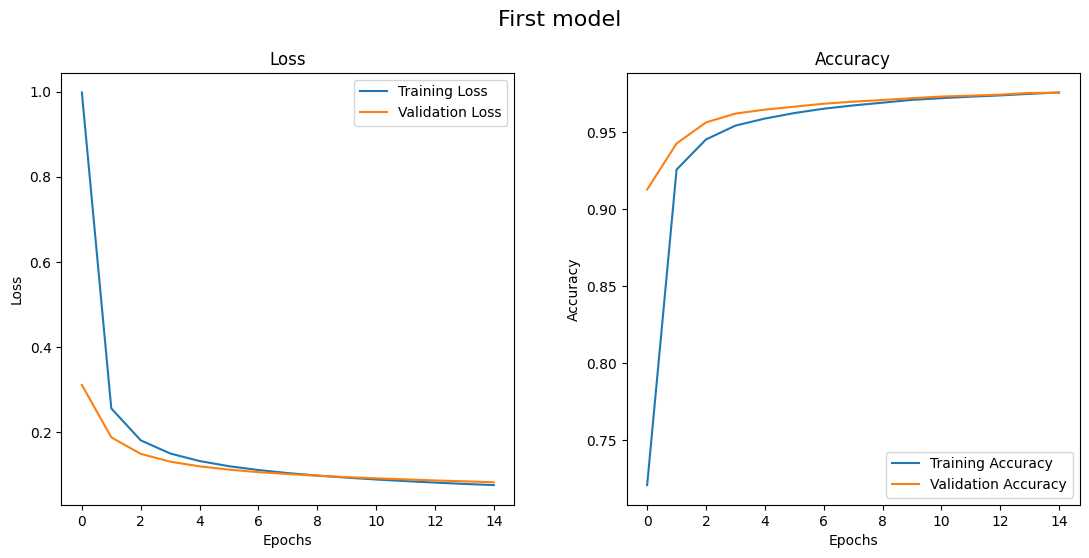

In [114]:
plot_performance(history1, "First model")

In [116]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07468102872371674
Test accuracy: 0.9779000282287598


# Second model

The second model has the same structure as the first model, but it uses the normalized (0-centered, std 1) training set. I made this, to verify that this strategy does improve the model's performance.

In [119]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(5,5)),
        layers.Conv2D(16, kernel_size=(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model2.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 4, 4, 16)            │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,034 (11.85 KB)

 Trainable params: 3,034 (11.85 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
batch_size = 128
epochs = 15

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train_normalized, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5588 - loss: 1.4330 - val_accuracy: 0.9221 - val_loss: 0.2661
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9268 - loss: 0.2439 - val_accuracy: 0.9491 - val_loss: 0.1741
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9470 - loss: 0.1701 - val_accuracy: 0.9573 - val_loss: 0.1371
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9587 - loss: 0.1345 - val_accuracy: 0.9638 - val_loss: 0.1163
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9642 - loss: 0.1134 - val_accuracy: 0.9673 - val_loss: 0.1043
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.1008 - val_accuracy: 0.9707 - val_loss: 0.0962
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0918 - val_accuracy: 0.9729 - val_loss: 0.0904
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0851 - val_accuracy: 0.

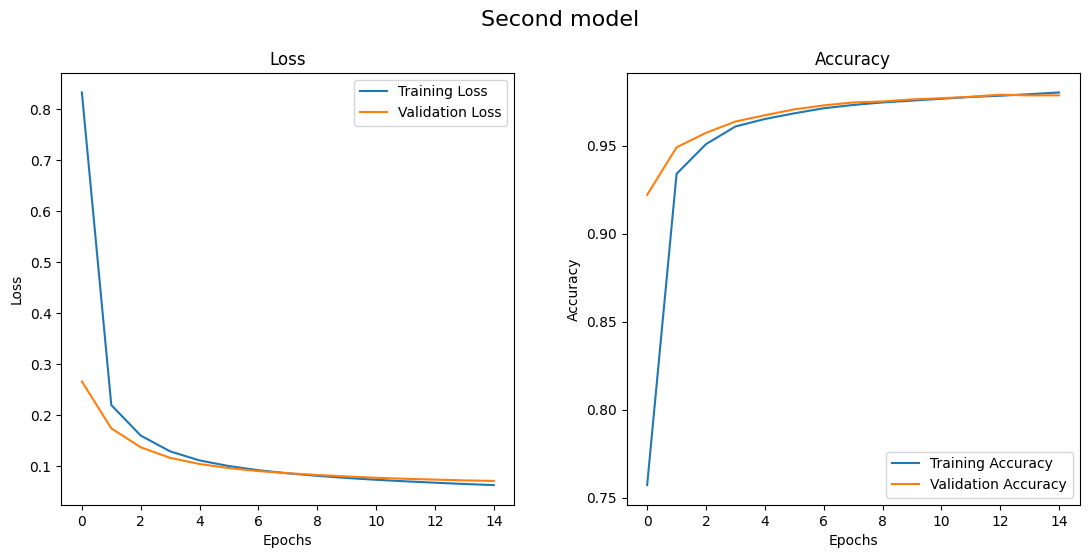

In [121]:
plot_performance(history2, "Second model")

In [122]:
score = model2.evaluate(x_test_normalized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06037464737892151
Test accuracy: 0.980400025844574


# Third model

In the third model, the strategy is to modify the previous model by adding more parameters, and getting as close to 7k as possible.

I also had to add a bit of dropout to prevent overfitting the model.

In [187]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(9,9), activation='relu'),
        layers.MaxPooling2D(pool_size=(6,6)),
        layers.Conv2D(31, kernel_size=(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dropout(0.1),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model3.summary()

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_196 (Conv2D)                  │ (None, 20, 20, 32)          │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_195 (MaxPooling2D)     │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_197 (Conv2D)                  │ (None, 2, 2, 31)            │           3,999 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_196 (MaxPooling2D)     │ (None, 1, 1, 31)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_90 (Flatten)                 │ (None, 31)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 31)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,943 (27.12 KB)

 Trainable params: 6,943 (27.12 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
batch_size = 128
epochs = 15

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train_normalized, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6599 - loss: 1.1186 - val_accuracy: 0.9578 - val_loss: 0.1520
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9416 - loss: 0.1995 - val_accuracy: 0.9689 - val_loss: 0.1066
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9570 - loss: 0.1424 - val_accuracy: 0.9732 - val_loss: 0.0870
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1188 - val_accuracy: 0.9764 - val_loss: 0.0769
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1029 - val_accuracy: 0.9794 - val_loss: 0.0682
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.0895 - val_accuracy: 0.9804 - val_loss: 0.0655
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0837 - val_accuracy: 0.9819 - val_loss: 0.0627
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0761 - val_accuracy: 0.

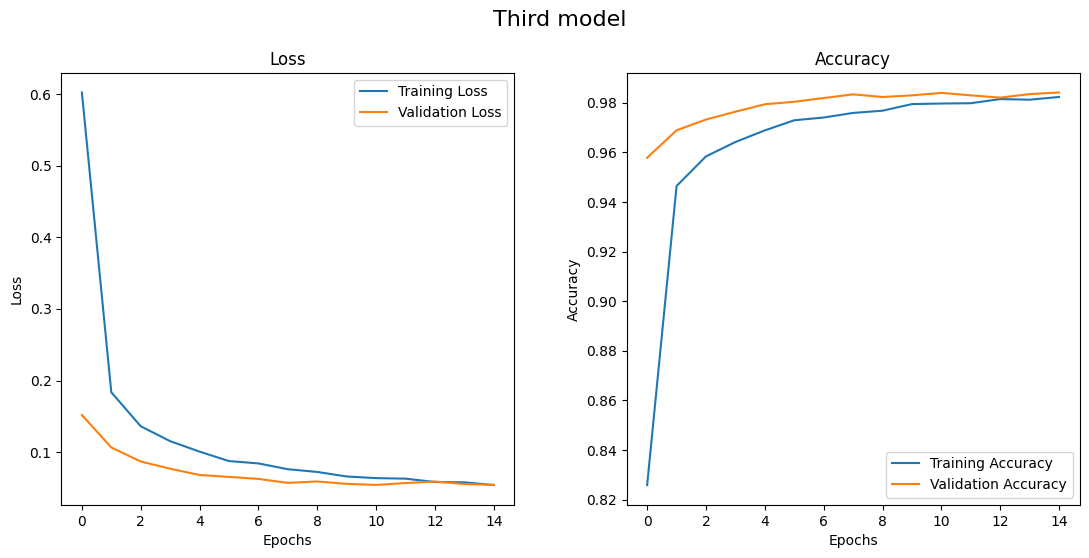

In [189]:
plot_performance(history3, "Third model")

In [190]:
score = model3.evaluate(x_test_normalized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04872306063771248
Test accuracy: 0.9853000044822693


# Fourth model

In the fourth model, the strategy is to modify the previous model by using smaller kernels and fewer filters in each layer, while adding more layers.

In [207]:
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(5,5), activation='relu'),
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(31, kernel_size=(2,2), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dropout(0.1),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model4.summary()

Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_241 (Conv2D)                  │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_242 (Conv2D)                  │ (None, 22, 22, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_223 (MaxPooling2D)     │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_243 (Conv2D)                  │ (None, 5, 5, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_244 (Conv2D)                  │ (None, 4, 4, 31)            │           2,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_224 (MaxPooling2D)     │ (None, 2, 2, 31)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_104 (Flatten)                │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 10)                  │           1,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,961 (27.19 KB)

 Trainable params: 6,961 (27.19 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
batch_size = 128
epochs = 15

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(x_train_normalized, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6322 - loss: 1.1118 - val_accuracy: 0.9607 - val_loss: 0.1300
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9498 - loss: 0.1603 - val_accuracy: 0.9764 - val_loss: 0.0796
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1026 - val_accuracy: 0.9797 - val_loss: 0.0641
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0828 - val_accuracy: 0.9820 - val_loss: 0.0583
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0727 - val_accuracy: 0.9837 - val_loss: 0.0550
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0627 - val_accuracy: 0.9846 - val_loss: 0.0492
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0558 - val_accuracy: 0.9859 - val_loss: 0.0479
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0503 - val_accuracy: 0.

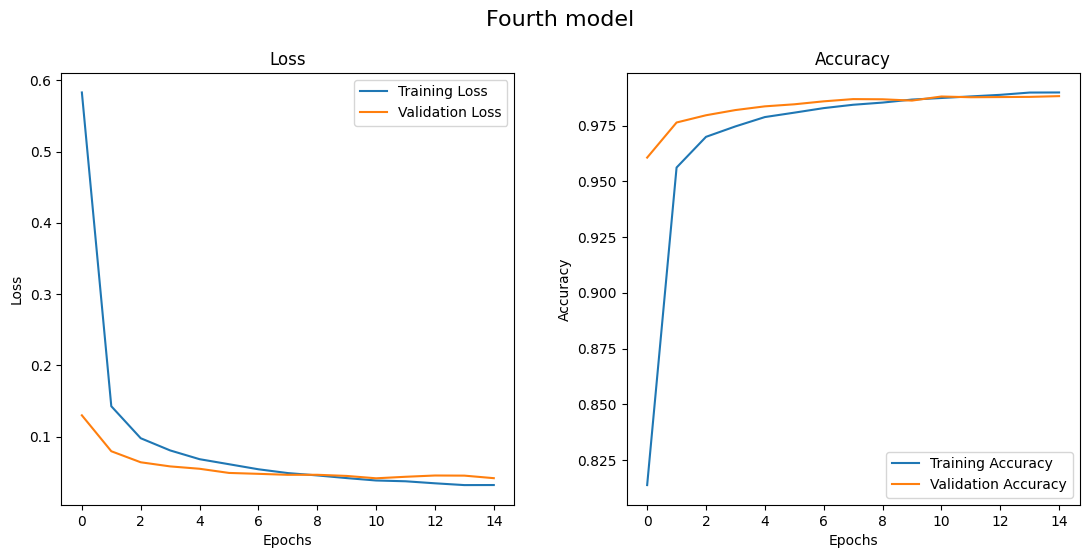

In [209]:
plot_performance(history4, "Fourth model")

In [210]:
score = model4.evaluate(x_test_normalized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034649841487407684
Test accuracy: 0.9901999831199646


# Fifth model

This is an alternative model where I've used padding, and less filters

In [9]:
model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5,5), activation='relu', padding='same'),
        layers.Conv2D(11, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Conv2D(12, kernel_size=(3,3), activation='relu', padding='same'),
        layers.Conv2D(24, kernel_size=(2,2), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dropout(0.10),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 11)          │             605 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 11)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 12)            │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 24)            │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 24)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           3,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,987 (27.29 KB)

 Trainable params: 6,987 (27.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size = 128
epochs = 15

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 = model5.fit(x_train_normalized, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - accuracy: 0.6671 - loss: 1.0061 - val_accuracy: 0.9663 - val_loss: 0.1133
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.9585 - loss: 0.1315 - val_accuracy: 0.9761 - val_loss: 0.0833
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 136ms/step - accuracy: 0.9715 - loss: 0.0914 - val_accuracy: 0.9788 - val_loss: 0.0701
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 135ms/step - accuracy: 0.9775 - loss: 0.0725 - val_accuracy: 0.9810 - val_loss: 0.0647
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.9796 - loss: 0.0630 - val_accuracy: 0.9834 - val_loss: 0.0577
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 138ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9850 - val_loss: 0.0519
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.9840 - loss: 0.0486 - val_accuracy: 0.9849 - val_loss: 0.0512
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 133ms/step - accuracy: 0.9862 - loss: 0

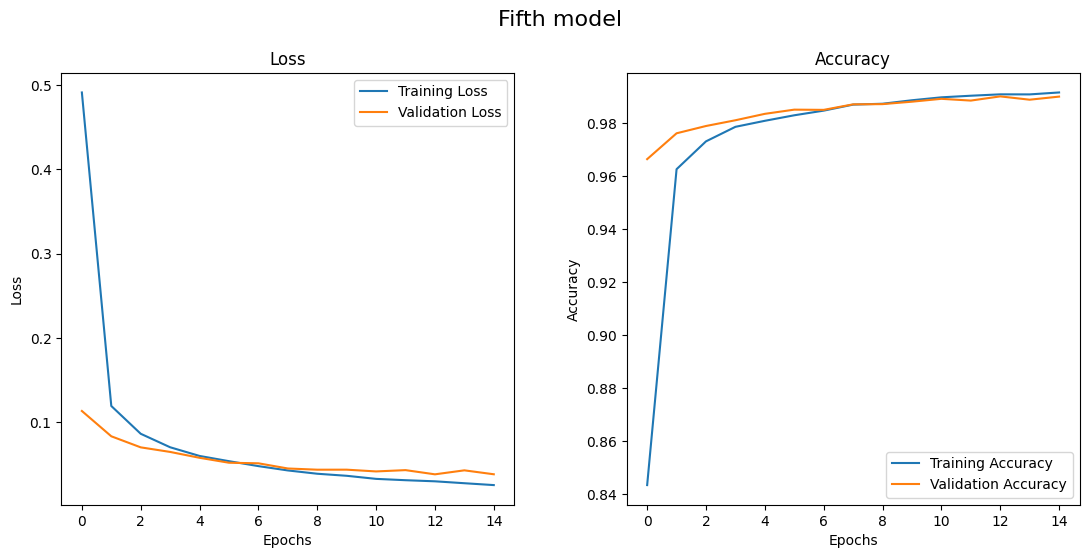

In [13]:
plot_performance(history5, "Fifth model")

In [15]:
score = model5.evaluate(x_test_normalized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03073572926223278
Test accuracy: 0.989799976348877
